In [166]:
# Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [167]:
# read dataset
df= pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Let's check if there is any missing values in the data

In [168]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no missing values in our data

Let's have more information about the dateset and check the statiscal analysis of the data

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [170]:
df.duplicated().sum()

0

In [171]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Interpretation: 
* The Outcome shows a minimum values equal to 0 and max=1, this will a binary classification problem
* The minimum of features like Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI are 0 and the maximum values are continous values
* The age of persons varies from 21 to 81, it means diabetes are more detected in adults people

### Exploratory Data Analysis (EDA)

In [172]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

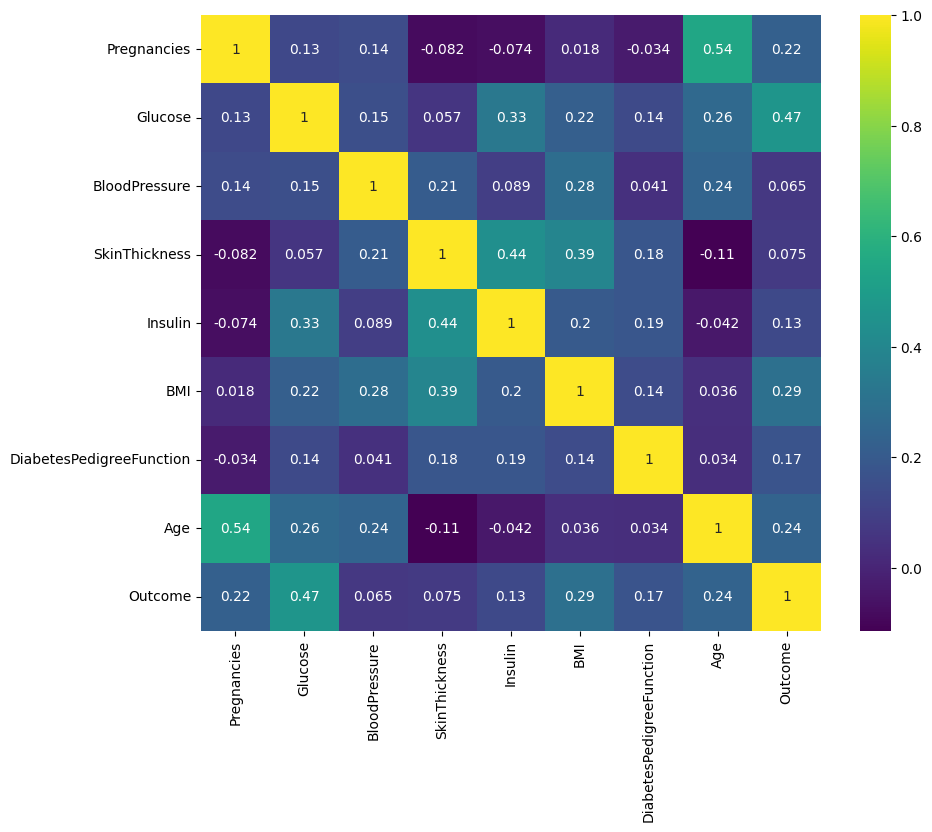

In [173]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [174]:
# from ydata_profiling import ProfileReport
# profile= ProfileReport(df)
# profile.to_notebook_iframe()

<b>The report genetareted by pandas profiling contains all the necessary visualizations about our dataset</b>

In [175]:
y= df.Outcome
X=df.drop('Outcome', axis=1)

In [176]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

* 0 represent Non diabetic persons
* 1 represent diabetic persons

<Axes: xlabel='Outcome', ylabel='count'>

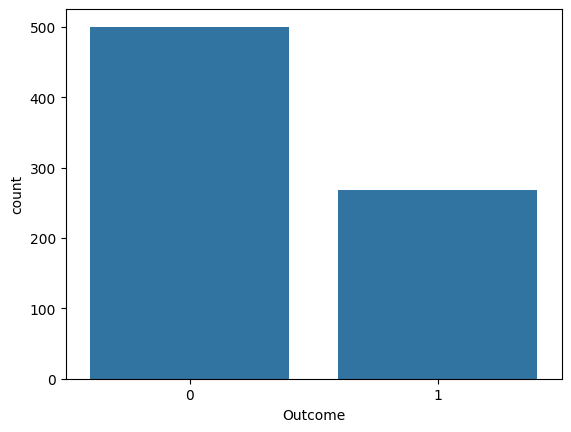

In [177]:
sns.countplot(df, x='Outcome')

In [178]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


<Axes: xlabel='Age', ylabel='count'>

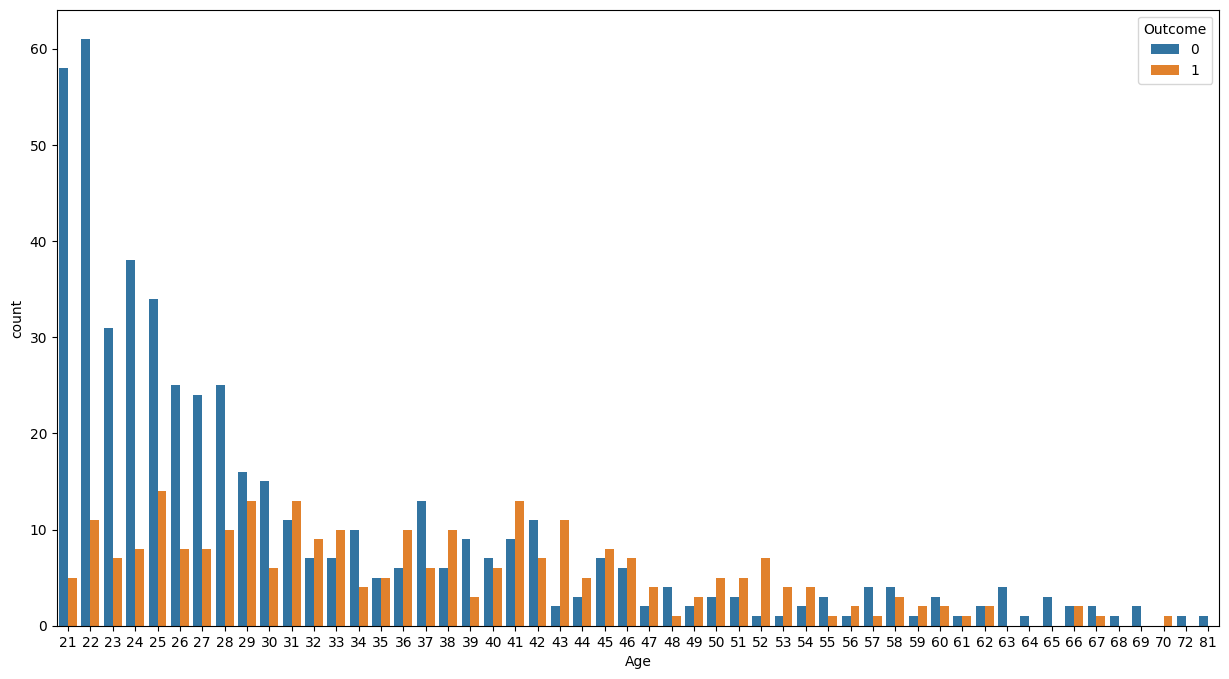

In [179]:
plt.figure(figsize=(15, 8))
sns.countplot(df, x='Age', hue='Outcome')

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [181]:
X_train.shape

(614, 8)

In [182]:
X_test.shape

(154, 8)

In [183]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
from sklearn.preprocessing import MinMaxScaler

# Create MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform on training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)


In [184]:
# X_train= pd.DataFrame(X_train, columns= df.columns)
# X_train

### Model Building

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [186]:
lr_clf= LogisticRegression()
svm_clf= SVC(kernel='linear')
nb_clf= BernoulliNB()
knn_clf= KNeighborsClassifier()
rf_clf= RandomForestClassifier(random_state=1000)
xgb_clf= XGBClassifier() 

In [187]:
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [188]:
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

In [189]:
nb_clf.fit(X_train, y_train)

BernoulliNB()

In [190]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [191]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1000)

In [192]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Model evaluation

In [193]:
from sklearn.metrics import accuracy_score

In [194]:
y_pred1= lr_clf.predict(X_test)

In [195]:
accuracy_score(y_test, y_pred1)

0.7337662337662337

In [196]:
print("The training score LR is:", lr_clf.score(X_train, y_train))
print("The test score with LR is:", lr_clf.score(X_test, y_test))

The training score LR is: 0.7850162866449512
The test score with LR is: 0.7337662337662337


In [197]:
y_pred2= svm_clf.predict(X_test)
accuracy_score(y_test, y_pred2)

0.7337662337662337

In [198]:
print("The training score with SVM is:", svm_clf.score(X_train, y_train))
print("The test score with SVM is:", svm_clf.score(X_test, y_test))

The training score with SVM is: 0.7785016286644951
The test score with SVM is: 0.7337662337662337


In [199]:
y_pred3= nb_clf.predict(X_test)
accuracy_score(y_test, y_pred3)

0.6428571428571429

In [200]:
y_pred4= knn_clf.predict(X_test)
accuracy_score(y_test, y_pred4)

c:\Users\Mariam\predapp\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7142857142857143

In [201]:
y_pred5= rf_clf.predict(X_test)
accuracy_score(y_test, y_pred5)

0.7662337662337663

In [202]:
print("The training score RF is:", rf_clf.score(X_train, y_train))
print("The test score with RF is:", rf_clf.score(X_test, y_test))

The training score RF is: 1.0
The test score with RF is: 0.7662337662337663


In [203]:
y_pred6= xgb_clf.predict(X_test)
accuracy_score(y_test, y_pred6)

0.7467532467532467

In [204]:
print("The training score XGB is:", xgb_clf.score(X_train, y_train))
print("The test score with XGB is:", xgb_clf.score(X_test, y_test))

The training score XGB is: 1.0
The test score with XGB is: 0.7467532467532467


<Axes: >

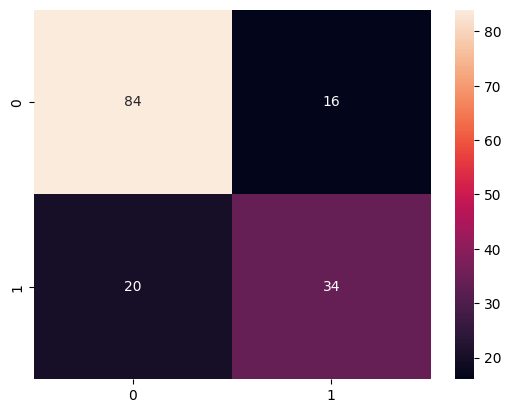

In [205]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred5), annot=True)

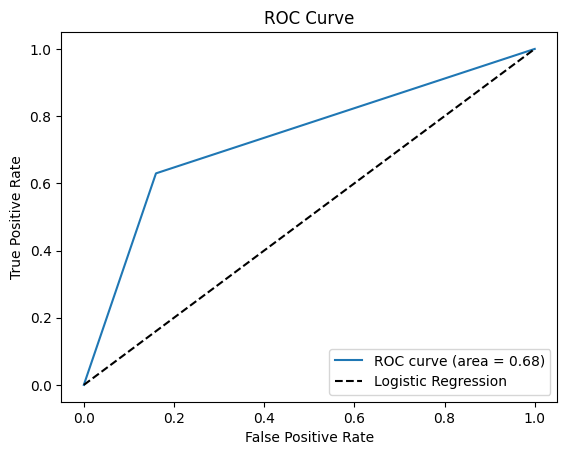

In [206]:
from sklearn.metrics import roc_curve, roc_auc_score 
# Compute the false positive rate (FPR)  
# and true positive rate (TPR) for different classification thresholds 
fpr, tpr, thresholds = roc_curve(y_test, y_pred5, pos_label=1)
# Compute the ROC AUC score 
roc_auc = roc_auc_score(y_test, y_pred1) 
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
# roc curve for tpr = fpr 
plt.plot([0, 1], [0, 1], 'k--', label='Logistic Regression') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()


### HyperParmterTuning

In [207]:
import numpy as np
from sklearn.model_selection import GridSearchCV
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [0.1, 1, 10],  
            #'gamma': [1, 0.1, 0.01],
            #'C': [1,10,20],
            'kernel': ['linear']
        }  
    },
     'knn': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [10,7,15],
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=1234),
        'params' : {
            #'n_estimators': [1,5,10],
            'n_estimators': [10, 12, 15, 150], 
            'max_features': ['sqrt', 'log2', None], 
            'max_depth': [10, 11, 12]
        }
    },
    'xg_boost': {
        'model': XGBClassifier(random_state=1234),
        'params' : {
              #'n_estimators': [1,5,10],
            'n_estimators': [10, 12, 15, 150], 
            'max_features': ['sqrt', 'log2', None], 
            'max_depth': [10, 11, 12]
        }
    },
    
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1,5,10,15],
            #'C' : np.logspace(-4, 4, 20),
            'n_jobs': [-1, 10, 15]
            #'penalty' : ['l1', 'l2', 'none']
        }
    }
}

In [208]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\Mariam\predapp\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Mariam\predapp\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

,model,best_score,best_params
0,svm,0.780168,"{'C': 10, 'kernel': 'linear'}"
1,knn,0.762255,{'n_neighbors': 10}
2,random_forest,0.780155,"{'max_depth': 11, 'max_features': 'sqrt', 'n_e..."
3,xg_boost,0.739464,"{'max_depth': 12, 'max_features': 'sqrt', 'n_e..."
4,logistic_regression,0.781781,"{'C': 5, 'n_jobs': -1}"


In [209]:
model1= LogisticRegression(C= 1, n_jobs=-1)
model1.fit(X_train, y_train)
y_pred_lr= model1.predict(X_test)

In [210]:
print("The training score with LogisticRegression is:", model1.score(X_train, y_train))
print("The test score with LogisticRegression is:", model1.score(X_test, y_test))

The training score with LogisticRegression is: 0.7850162866449512
The test score with LogisticRegression is: 0.7337662337662337


In [211]:
#from xgboost import XGBClassifier
#model2= XGBClassifier(max_depth=9)
model2= RandomForestClassifier(max_depth=12, max_features='log2', n_estimators=15)
model2.fit(X_train, y_train)
y_pred_rf= model2.predict(X_test)
print("The training score with RandomForest is:", model2.score(X_train, y_train))
print("The test score with RandomForest is:", model2.score(X_test, y_test))

The training score with RandomForest is: 0.990228013029316
The test score with RandomForest is: 0.7792207792207793


In [212]:
model3= SVC(C= 0.1,kernel='linear')
model3.fit(X_train, y_train)
y_pred_svm= model3.predict(X_test)
print("The training score with SVM is:", model3.score(X_train, y_train))
print("The test score with SVM is:", model3.score(X_test, y_test))

The training score with SVM is: 0.7035830618892508
The test score with SVM is: 0.6688311688311688


In [213]:
#from xgboost import XGBClassifier
#model2= XGBClassifier(max_depth=9)
model4= XGBClassifier(max_depth=10, n_estimators=15)
model4.fit(X_train, y_train)
y_pred_xgb= model4.predict(X_test)
print("The training score with Xgboost is:", model4.score(X_train, y_train))
print("The test score with Xgboost is:", model4.score(X_test, y_test))

The training score with Xgboost is: 0.995114006514658
The test score with Xgboost is: 0.7922077922077922


Confusion matrix of Random Forest Model


<Axes: >

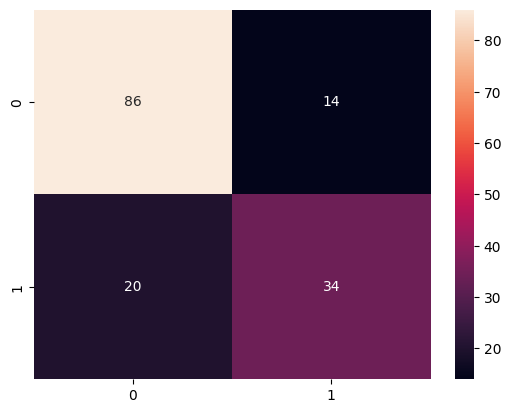

In [214]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion matrix of Random Forest Model")
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True)

Confusion matrix of XGBoost Model


<Axes: >

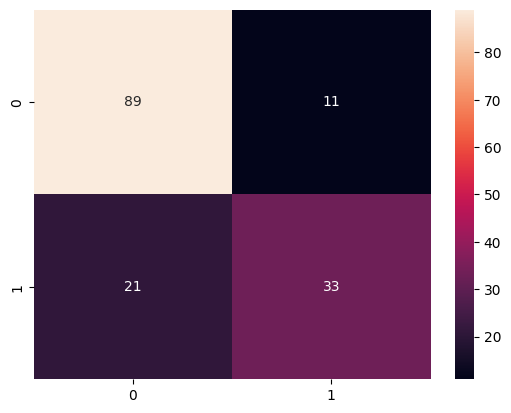

In [215]:
print("Confusion matrix of XGBoost Model")

sns.heatmap(confusion_matrix(y_test,y_pred_xgb), annot=True)

In [216]:
print("Classificatio_report for XGBoost")
print(classification_report(y_test, y_pred_xgb))

Classificatio_report for XGBoost
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       100
           1       0.75      0.61      0.67        54

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



In [217]:
# Access feature importance scores with XGBOOst
importance_scores = model4.feature_importances_
# Print or analyze the importance scores
print(importance_scores)

[0.09961323 0.32193708 0.07033017 0.0632641  0.08099869 0.15195078
 0.08808281 0.12382316]


In [229]:
# Select top N features based on importance scores
top_n_indices = importance_scores.argsort()[-8:][::-1]
#selected_features = X_train[:, top_n_indices]


In [230]:
# Assuming you have selected features_indices
X_train_selected = X_train[:, top_n_indices]
X_test_selected = X_test[:, top_n_indices]


In [234]:
X_test_selected.shape

(154, 8)

In [231]:
# Assuming model is your previously trained model
model_selected = XGBClassifier(max_depth=10, n_estimators=15)
model_selected.fit(X_train_selected, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=15, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [232]:
# evaluate performance
y_pred_selected = model_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy with selected features:", accuracy_selected)


Accuracy with selected features: 0.7532467532467533


In [222]:
import pickle
filename = 'diabetes_model.sav'
pickle.dump(model4, open(filename, 'wb'))

In [223]:
import joblib
filename = 'diabetes_model.joblib'
joblib.dump(model4, open(filename, 'wb'))

In [224]:
filename = 'diabetes.joblib'
joblib.dump(model2, open(filename, 'wb'))

In [225]:
# loading the saved model
loaded_model = pickle.load(open('mymodels/diabetes_model.sav', 'rb'))

In [226]:
loaded_model = joblib.load(open('diabetes_model.joblib', 'rb'))

In [227]:
loaded_model = joblib.load(open('diabetes.joblib', 'rb'))

In [228]:
# input_data = (5,166,72,19,175,25.8,0.587,51)
input_data=(1, 89, 66, 23, 94, 28.1, 0.167, 21)	

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


In [235]:
input_data_reshaped

array([[ 1.   , 89.   , 66.   , 23.   , 94.   , 28.1  ,  0.167, 21.   ]])